In [57]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
import numpy as np
import seaborn as sns

plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

# General EDA

In [9]:
df = pd.read_csv('merged_df.csv')
df.head(5)

,id,date,customer_id,transaction_id,sku_category,sku,quantity,sales_amount,gender,age,country
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece
1,639,2021-01-04,2547,332,Q4N,MM3E0,1.0,12.69,M,43,Greece
2,7800,2021-01-25,2547,3743,X52,885U7,1.0,4.95,M,43,Greece
3,7801,2021-01-25,2547,3743,29A,A59HR,3.0,6.24,M,43,Greece
4,17633,2021-02-22,2547,8477,L9F,7W8WS,1.0,11.75,M,43,Greece


questions i need to answer

sales analysis
what are the biggest countries in sales amount?
what are the trends in sales over time?

product analysis
what are the most sold sku and sku category per country?
what are the average value per sku and sku category, as well as the most and least valuable?
are there any skus or categories that are underperforming?

churn analysis
which products are frequently purchased by customer who later churn?

inventory and supply chain management
are there correlations between certain skus being purchased together?

time series analysis
how do sales fluctuate by day of the week or time of the month?
are there any seasonal patterns in sku category sales?

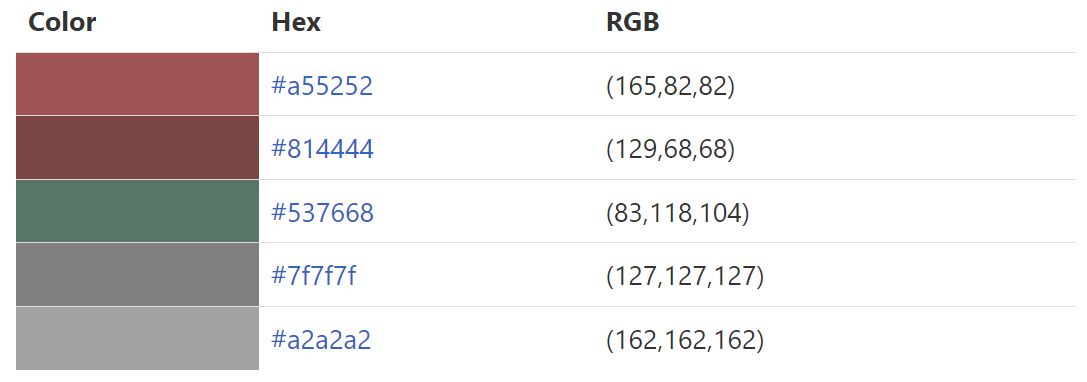


## Sales Analysis

#### What are the biggest countries in sales amount?

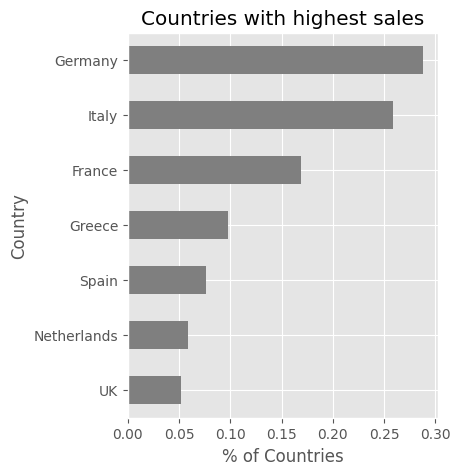

In [87]:
colors = ['#7f7f7f']
ax = df['country'].value_counts(ascending=True, normalize=True) \
        .plot(kind='barh',
              color = colors,
              figsize=(4, 5))

ax.set_ylabel('Country')
ax.set_xlabel('% of Countries')
ax.set_title('Countries with highest sales')

plt.show()

## Demographics
### What is the distribution of sales between genders?

Text(0.5, 1.0, 'Gender Distribution')

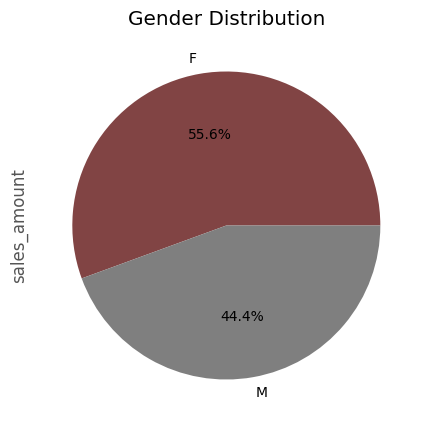

In [84]:
colors = ['#814444','#7f7f7f']
ax = df.groupby('gender')['sales_amount'].sum() \
        .plot(kind='pie',
              autopct='%.1f%%',
              title='Proportion of sales amount per gender',
              colors = colors,
              figsize=(5,5))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Gender Distribution')

In [85]:
df['gender'].value_counts() *  100 / len(df)

gender
F    55.52974
M    44.47026
Name: count, dtype: float64

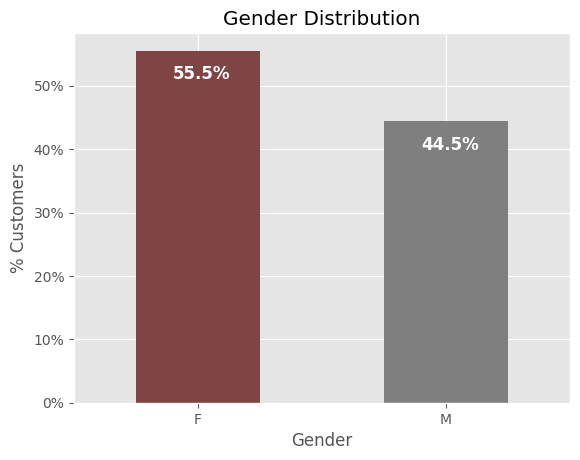

In [81]:
colors = ['#814444','#7f7f7f']
ax = (df['gender'].value_counts() * 100.0 /len(df)).plot(kind='bar',
                                                        stacked = True,
                                                        rot = 0,
                                                        color = colors)
      
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')


## Annotating ## 

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

## Product Analysis

### What are the most sold sku and sku category per country?

In [50]:
countries = df['country'].unique()

for country in countries:
    print(country)

Greece
Spain
France
Italy
Germany
UK
Netherlands


<Axes: xlabel='sku_category'>

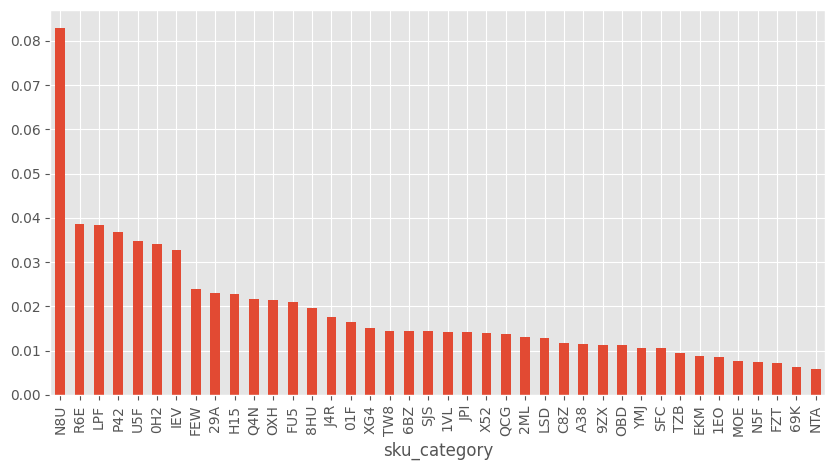

In [8]:
# Example: Count the number of unique SKUs purchased by each customer
sku_count_per_customer = df.groupby('customer_id')['sku'].nunique()

# Example: Calculate the frequency of each SKU category
sku_category_freq = df['sku_category'].value_counts(normalize=True)
sku_category_freq.nlargest(40).plot(kind='bar', figsize=(10,5))

# RFM Analysis EDA

In [ ]:
rmf_df = pd.read_csv('rfm2.csv')
rmf_df